In [1]:
# !pip install plotly_express

In [4]:
# !pip install pandas_profiling

In [5]:
# conda install -c conda-forge altair 

In [6]:
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import plotly_express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta
import pandas_profiling
import altair as alt
from altair.expr import datum

In [7]:
data = pd.read_csv("/Users/frj/Desktop/pythondata/Border_Crossing_Entry_Data.csv")
data.head(2)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,01/02/2020,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,01/02/2020,Personal Vehicles,763


In [8]:
print(data.info()) # inspect data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355511 entries, 0 to 355510
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Port Name  355511 non-null  object
 1   State      355511 non-null  object
 2   Port Code  355511 non-null  int64 
 3   Border     355511 non-null  object
 4   Date       355511 non-null  object
 5   Measure    355511 non-null  object
 6   Value      355511 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.0+ MB
None


In [10]:
# The column 'date' is object. Now, let's change is to datetime format:
data['Date'] = pd.to_datetime(data['Date'])
data.head(2)

,Port Name,State,Port Code,Border,Date,Measure,Value
0,Alcan,AK,3104,US-Canada Border,2020-01-02,Personal Vehicle Passengers,1414
1,Alcan,AK,3104,US-Canada Border,2020-01-02,Personal Vehicles,763


In [11]:
# Now let's change columns name to lower case to make it easy: 
data.columns = data.columns.str.lower()

In [12]:
# Rename 'port name' to make all letters attached
data.rename(columns={'port name': 'port_name'},inplace=True)

In [13]:
# reset dataframe: add year & day of the week column, using python datetime function: 
data['year'] = data['date'].dt.strftime('%Y')
data['day_of_week'] = data['date'].dt.day_name()

data.head(3)

,port_name,state,port code,border,date,measure,value,year,day_of_week
0,Alcan,AK,3104,US-Canada Border,2020-01-02,Personal Vehicle Passengers,1414,2020,Thursday
1,Alcan,AK,3104,US-Canada Border,2020-01-02,Personal Vehicles,763,2020,Thursday
2,Alcan,AK,3104,US-Canada Border,2020-01-02,Truck Containers Empty,412,2020,Thursday


In [14]:
# Which border is the busiest? 

# Create new dataframe and sort in descending order:
busy_border = data.groupby("border").value.sum().reset_index()
busy_border.sort_values(["value"], axis=0, 
                 ascending=[False], inplace=True)  
busy_border

,border,value
1,US-Mexico Border,7337300710
0,US-Canada Border,2776127401


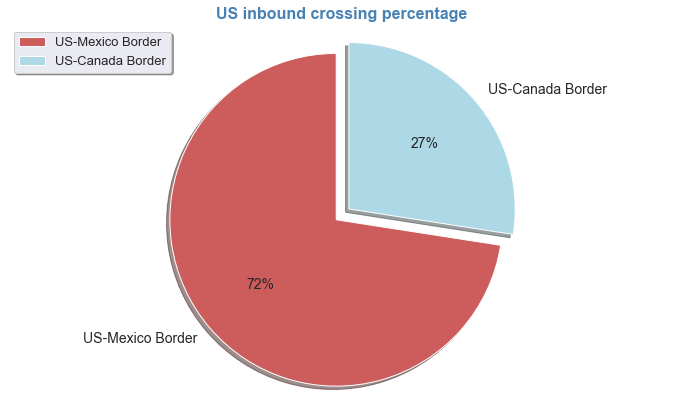

In [41]:
# pie chart visualization
border_value = busy_border['value']
border_name = busy_border['border']

explode = (0, 0.1)   #only explode the 2nd slice
colors = ['indianred','lightblue']

fig1, ax1 = plt.subplots(figsize=(12,7))

ax1.pie(border_value, autopct='%d%%', labels=border_name, explode=explode, colors=colors, shadow=True, startangle=90,
       textprops={'fontsize': 14})

plt.title('US inbound crossing percentage', size=16, fontweight="bold", color="steelblue")
ax1.axis('equal') 
plt.legend(border_name, loc= "upper left", fancybox=True, framealpha=1, shadow=True, fontsize=13)

plt.show()

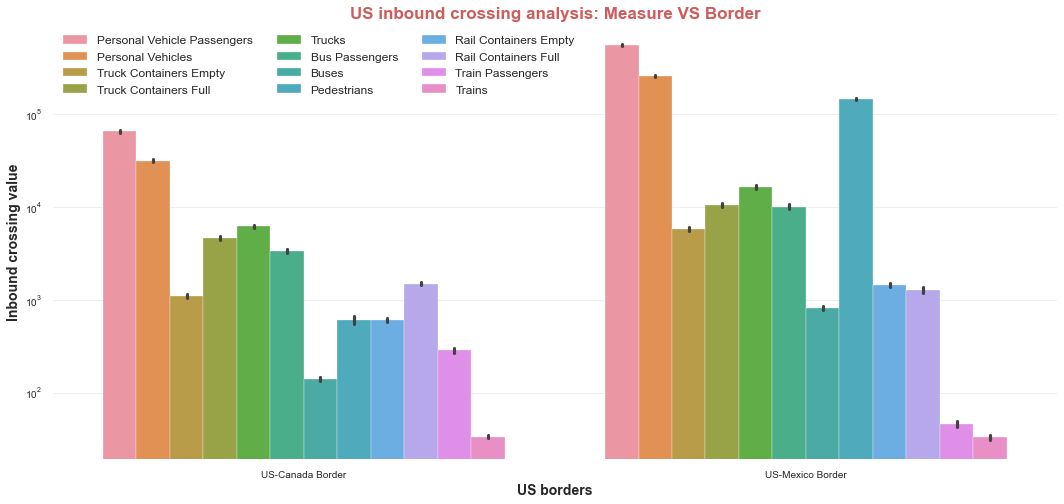

In [16]:
# The transportation way of inbound crossing for each US border
# visualization with Seaborn

border_tick=range(2)

fig2, ax2 = plt.subplots(figsize=(18,8))

ax2 = sns.barplot(x=data['border'], y=data['value'], hue=data['measure'], data=data, log=True)
ax2.set_xlabel('US borders', size=14, fontweight='bold')
ax2.set_ylabel('Inbound crossing value', size=14, fontweight='bold')
plt.legend(loc="upper left", frameon=False, ncol=3, fontsize=12)
plt.title("US inbound crossing analysis: Measure VS Border", size=17, color="indianred", fontweight='bold')

# bar chart styling
sns.despine(left=True)  # remove upper and left line

ax2.set_axisbelow(True)  
ax2.yaxis.grid(True, color='#EEEEEE')
ax2.xaxis.grid(False)

plt.show()

In [42]:
# Treemap breakdown with Plotly express
fig = px.treemap(data, path=['border','state','measure'], values='value',
                  color='value', hover_data=['state'],
                  color_continuous_scale='RdBu')

fig.update_layout(title="US inbound crossing with Canada and Mexico: State level",
                  width=1000, height=700, uniformtext=dict(minsize=10, mode='hide'))  

fig.show()

In [18]:
# Time series analysis

# rearrange new dataframe
time_line = data.groupby(['date', 'year', 'border', 'day_of_week']).value.sum().reset_index()
time_line.head(2)

,date,year,border,day_of_week,value
0,1996-01-01,1996,US-Canada Border,Monday,9492824
1,1996-01-01,1996,US-Mexico Border,Monday,23057518


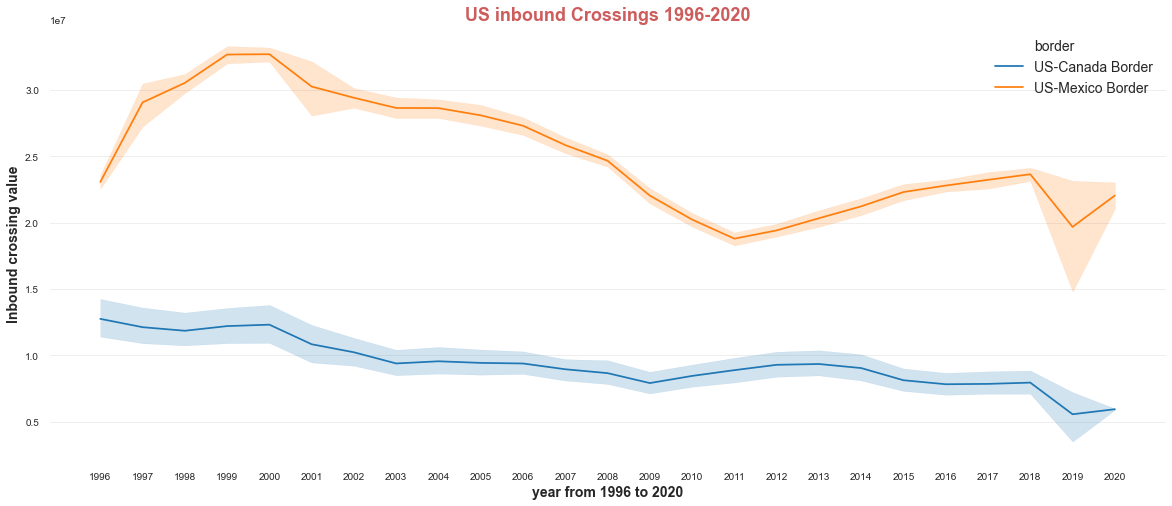

In [19]:
# time series: yearly

fig, ax = plt.subplots(figsize=(20,8))

ax = sns.lineplot(data=time_line, x='year',y='value', hue='border')
plt.title('US inbound Crossings 1996-2020', fontweight='bold', color='indianred', fontsize=18)

ax.set_xlabel('year from 1996 to 2020', size=14, fontweight='bold')
ax.set_ylabel('Inbound crossing value', size=14, fontweight='bold')
plt.legend(fontsize='14', frameon=False)

sns.despine(left=True)
ax.set_axisbelow(True)  #styling
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show()

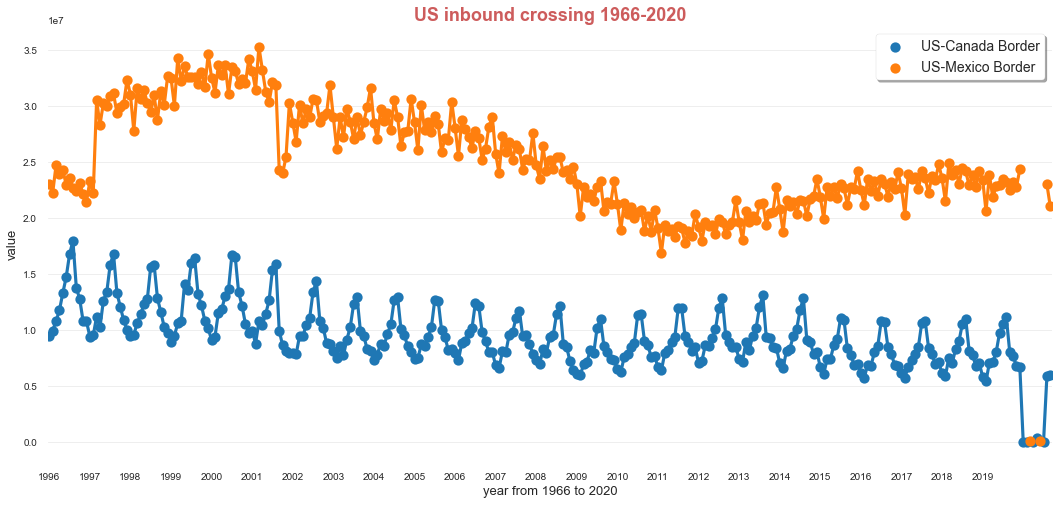

In [20]:
# time series detail

fig, ax = plt.subplots(figsize=(18, 8))

sns.pointplot(ax=ax, data=time_line, x="date", y="value", hue="border")
plt.title('US inbound crossing 1966-2020', fontsize=18, fontweight='bold', color='indianred')
ax.set_xlabel('year from 1966 to 2020', size=13)
ax.set_ylabel('value', size=13)
plt.legend(fancybox=True, shadow=True, fontsize=14)

# set xlabels as the datetime data for the given labelling frequency
ax.set_xticklabels(time_line.iloc[::12].date.dt.year.unique())

# set the xticks at the same frequency as the xlabels
xtix = ax.get_xticks()
ax.set_xticks(xtix[::12])

sns.despine(left=True)
ax.set_axisbelow(True)  # styling
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show()

In [21]:
# state level yearly transportation evolution
tran = data.groupby(['measure', 'state','year']).value.sum().reset_index()
tran.head(10)

,measure,state,year,value
0,Bus Passengers,AK,1996,106758
1,Bus Passengers,AK,1997,133063
2,Bus Passengers,AK,1998,149938
3,Bus Passengers,AK,1999,156234
4,Bus Passengers,AK,2000,149128
5,Bus Passengers,AK,2001,138933
6,Bus Passengers,AK,2002,141450
7,Bus Passengers,AK,2003,147567
8,Bus Passengers,AK,2004,145868
9,Bus Passengers,AK,2005,147633


In [43]:
# Plotly facet chart visualization
fig = px.scatter(tran, x="year", y="value", color="measure", facet_col="state",
       facet_col_wrap=5)

fig.update_layout(title="US inbound crossing measure from Canada and Mexico border 1996-2020", 
                  width=1000, height=700)

fig.update_xaxes(showgrid=False)

fig.show()

In [23]:
# day of week analysis
# regroup related data

week_table = data.groupby(['border', 'day_of_week']).value.count().reset_index()
week_table.head(5)

,border,day_of_week,value
0,US-Canada Border,Friday,39508
1,US-Canada Border,Monday,38699
2,US-Canada Border,Saturday,39048
3,US-Canada Border,Sunday,38161
4,US-Canada Border,Thursday,40084


In [24]:
# Create pivot table

pivot_week = pd.pivot_table(data, 'value', ['border','state','year'], 'day_of_week')
pivot_week.head()

# Reorder column
pivot_week = pivot_week[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday']]
pivot_week.head()

day_of_week                       Monday      Tuesday    Wednesday  \
border           state year                                          
US-Canada Border AK    1996  1678.416667   847.333333   347.666667   
                       1997  3084.916667  3937.444444  1664.347222   
                       1998   913.236111  3564.250000  4964.777778   
                       1999   397.694444   964.152778  3657.861111   
                       2000   409.416667   406.375000   431.638889   

day_of_week                     Thursday       Friday     Saturday  \
border           state year                                          
US-Canada Border AK    1996   391.777778   763.208333  3011.000000   
                       1997   866.916667   389.875000   381.736111   
                       1998  1888.652778  1037.541667   383.236111   
                       1999  3912.083333  1639.847222  1057.750000   
                       2000  3644.333333  4346.611111  2004.347222   

day_of_week                       Sunday  
border           state year               
US-Canada Border AK    1996  3761.250000  
                       1997   823.416667  
                       1998   421.791667  
                       1999   413.333333  
                       2000  1047.555556

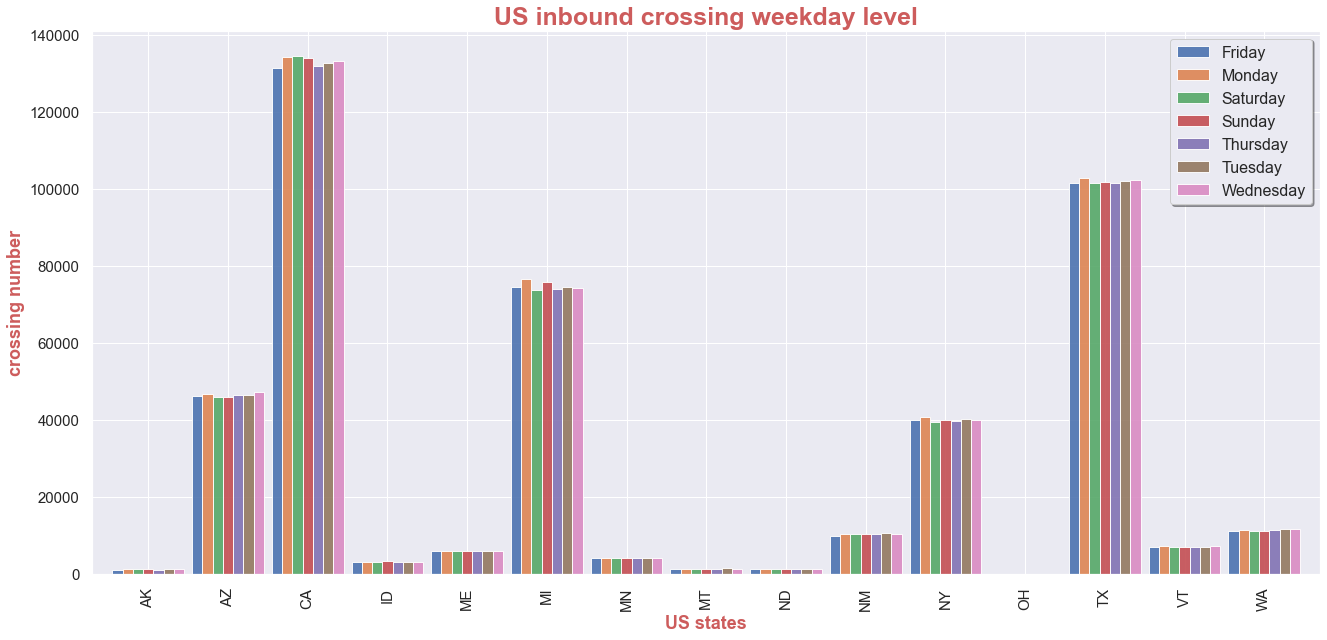

In [25]:
# State level inbound crossing for each day of week
sns.set()
pd.pivot_table(data, 'value', ['state'], 'day_of_week').plot(kind= 'bar', width=0.9, alpha=0.9, figsize=(22, 10), title="US inbound crossing weekday level", fontsize=15)
plt.ylabel("crossing number", fontsize=18, color='indianred', fontweight='bold')
plt.xlabel("US states", fontsize=18, color='indianred', fontweight='bold')
plt.title('US inbound crossing weekday level', fontsize=25, color='indianred', fontweight='bold')
plt.legend(fancybox=True, shadow=True, fontsize=16)

# Monday has a noticeable high rate of border crossing while Friday is realtively flat. Hypothesis: People enters US for work, then go back for weekend.

In [26]:
# legal VS illegal crossing analysis: border level

# create new column and fill its value with lambda function: 
data['law'] = data.measure.apply(lambda x: 'illegal' if x == 'Truck Containers Empty' or x == 'Truck Containers Full' or x =='Rail Containers Empty' or x == 'Rail Containers Full' else 'legal')
data.head()

,port_name,state,port code,border,date,measure,value,year,day_of_week,law
0,Alcan,AK,3104,US-Canada Border,2020-01-02,Personal Vehicle Passengers,1414,2020,Thursday,legal
1,Alcan,AK,3104,US-Canada Border,2020-01-02,Personal Vehicles,763,2020,Thursday,legal
2,Alcan,AK,3104,US-Canada Border,2020-01-02,Truck Containers Empty,412,2020,Thursday,illegal
3,Alcan,AK,3104,US-Canada Border,2020-01-02,Truck Containers Full,122,2020,Thursday,illegal
4,Alcan,AK,3104,US-Canada Border,2020-01-02,Trucks,545,2020,Thursday,legal


In [27]:
# extract categorical data: illegal crossing
illegal_data = data[data.law == 'illegal']
illegal_data2 = illegal_data.groupby(['year', 'border']).value.sum().reset_index()
illegal_data2.head()

,year,border,value
0,1996,US-Canada Border,2109673
1,1996,US-Mexico Border,3354140
2,1997,US-Canada Border,2968205
3,1997,US-Mexico Border,3634946
4,1998,US-Canada Border,6120191


In [28]:
# stacked area visualization

alt.Chart(illegal_data2).mark_area(opacity=0.34).encode(
    x="year:T",
    y=alt.Y("value:Q", stack=None),
    color="border:N", tooltip=['value', 'year', 'border']).properties(title='US illegal inbound crossing', height=400, width=800)

alt.Chart(...)

In [29]:
# legal VS illegal crossing analysis: state level

measure_ill = data[data.law == 'illegal']
measure_ill = measure_ill.groupby(['border', 'measure', 'state', 'year']).value.sum().reset_index()
measure_ill.head()

,border,measure,state,year,value
0,US-Canada Border,Rail Containers Empty,AK,1996,0
1,US-Canada Border,Rail Containers Empty,AK,1997,0
2,US-Canada Border,Rail Containers Empty,AK,1998,0
3,US-Canada Border,Rail Containers Empty,AK,1999,0
4,US-Canada Border,Rail Containers Empty,AK,2000,0


In [30]:
# set pivot table: columns should be illega crossing measure
pivot_illegal = pd.pivot_table(measure_ill, 'value', ['state'], 'measure')
pivot_illegal.head(5)

measure,Rail Containers Empty,Rail Containers Full,Truck Containers Empty,Truck Containers Full
state,,,,
AK,0.00,0.00,2990.12,6840.44
AZ,22892.48,30611.52,84950.68,262494.44
CA,9672.24,1196.00,411093.48,660817.44
ID,5844.60,77539.64,8623.08,48217.84
ME,21067.16,18944.24,95059.60,250444.04


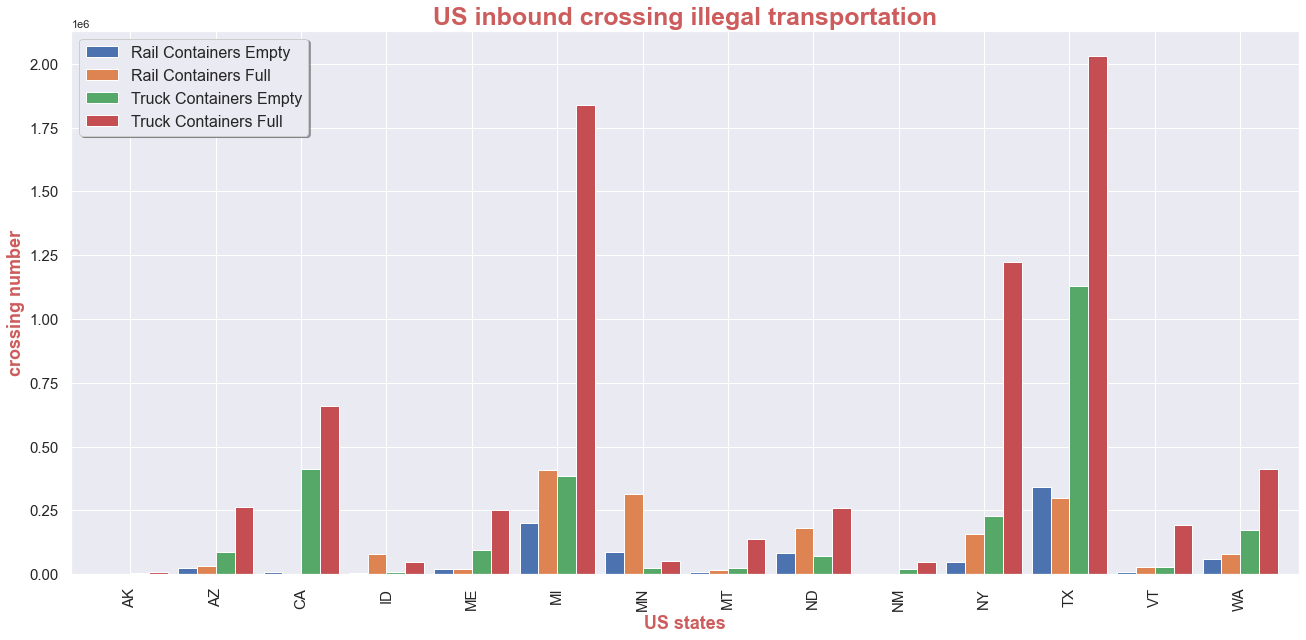

In [31]:
# plot pivot table outcome with Seaborn

sns.set()
pd.pivot_table(measure_ill, 'value', ['state'], 'measure').plot(kind= 'bar', width=0.88, figsize=(22, 10), title="US inbound crossing weekday level", fontsize=15)
plt.ylabel("crossing number", fontsize=18, color='indianred', fontweight='bold')
plt.xlabel("US states", fontsize=18, color='indianred', fontweight='bold')
plt.title('US inbound crossing illegal transportation', fontsize=25, color='indianred', fontweight='bold')
plt.legend(fancybox=True, shadow=True, fontsize=16)

# Truck is the most popular transportation.
# Most illegal crossing states: Michegan, Texas, New York 

In [32]:
# Among legal crossings: private VS public
# Extract legal dataset
all_legal = data[data.law == 'legal']
all_legal.head()

,port_name,state,port code,border,date,measure,value,year,day_of_week,law
0,Alcan,AK,3104,US-Canada Border,2020-01-02,Personal Vehicle Passengers,1414,2020,Thursday,legal
1,Alcan,AK,3104,US-Canada Border,2020-01-02,Personal Vehicles,763,2020,Thursday,legal
4,Alcan,AK,3104,US-Canada Border,2020-01-02,Trucks,545,2020,Thursday,legal
5,Alexandria Bay,NY,708,US-Canada Border,2020-01-02,Bus Passengers,1174,2020,Thursday,legal
6,Alexandria Bay,NY,708,US-Canada Border,2020-01-02,Buses,36,2020,Thursday,legal


In [33]:
# Regroup and rename measure elements in dataset

all_legal.loc[(all_legal['measure'] == 'Bus Passengers') | (all_legal['measure'] == 'Train Passengers') | (all_legal['measure'] == 'Buses') | (all_legal['measure'] == 'Trains'), 'measure'] = 'public'
all_legal.loc[(all_legal['measure'] == 'Personal Vehicle Passengers') | (all_legal['measure'] == 'Personal Vehicles') | (all_legal['measure'] == 'Pedestrians') | (all_legal['measure'] == 'Trucks'), 'measure'] = 'private'
all_legal.head()

/Users/frj/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,port_name,state,port code,border,date,measure,value,year,day_of_week,law
0,Alcan,AK,3104,US-Canada Border,2020-01-02,private,1414,2020,Thursday,legal
1,Alcan,AK,3104,US-Canada Border,2020-01-02,private,763,2020,Thursday,legal
4,Alcan,AK,3104,US-Canada Border,2020-01-02,private,545,2020,Thursday,legal
5,Alexandria Bay,NY,708,US-Canada Border,2020-01-02,public,1174,2020,Thursday,legal
6,Alexandria Bay,NY,708,US-Canada Border,2020-01-02,public,36,2020,Thursday,legal


In [34]:
# create finalsorted table: pu_pri
pu_pri = all_legal[['year', 'state', 'measure', 'value']]
pu_pri.head(5)

,year,state,measure,value
0,2020,AK,private,1414
1,2020,AK,private,763
4,2020,AK,private,545
5,2020,NY,public,1174
6,2020,NY,public,36


In [35]:
# create pivot table show private & public
pivot_pupri = pd.pivot_table(pu_pri, 'value', ['state','year'], 'measure')
pivot_pupri.head(3)

measure         private       public
state year                          
AK    1996  2749.437500   957.826389
      1997  2664.812500  1144.166667
      1998  3054.486111  1322.645833

In [36]:
pivot_pupri = pivot_pupri.reset_index()
pivot_pupri.head()   # reconvert pivot table to dataframe

measure,state,year,private,public
0,AK,1996,2749.437500,957.826389
1,AK,1997,2664.812500,1144.166667
2,AK,1998,3054.486111,1322.645833
3,AK,1999,2710.680556,1352.777778
4,AK,2000,2730.597222,1349.375000


In [37]:
# Calculate percentage of public 
pivot_pupri['per_public'] = pivot_pupri.apply(lambda row: row['public']/(row['private']+row['public']), axis=1)
pivot_pupri.head()

measure,state,year,private,public,per_public
0,AK,1996,2749.437500,957.826389,0.258365
1,AK,1997,2664.812500,1144.166667,0.300387
2,AK,1998,3054.486111,1322.645833,0.302172
3,AK,1999,2710.680556,1352.777778,0.332913
4,AK,2000,2730.597222,1349.375000,0.330731


In [38]:
# Now, visualize public measure percentage

fig = px.scatter(pivot_pupri, x="year", y="per_public", facet_col="state",
       facet_col_wrap=5)

fig.update_layout(title="public transportation percentage from 1966 to 2020", 
                  width=1000, height=700)

fig.layout.yaxis2.update(matches=None)  # matches=none, reset y value
fig.update_xaxes(showgrid=False)
fig.show()

# Wow! Alaska has an outstanding high level of public transportation VS private

In [39]:
# Explore Alaska data

alaska = data.groupby(['year', 'measure', 'state']).value.sum().reset_index()
alaska.head()

alaska = alaska[alaska.state == 'AK'].reset_index()
alaska.head()

ooo = alaska[(alaska.year == '2017') | (alaska.year == '2018') | (alaska.year == '2019')]
nnn = ooo[(ooo.measure == 'Bus Passengers') | (ooo.measure == 'Train Passengers') | (ooo.measure == 'Buses') | (ooo.measure == 'Trains')]  
nnn.head(12)


# train & bus passengers are increasing largely from 2017 to 2019!

,index,year,measure,state,value
252,3528,2017,Bus Passengers,AK,188239
253,3542,2017,Buses,AK,12220
257,3622,2017,Train Passengers,AK,93387
258,3635,2017,Trains,AK,311
262,3690,2018,Bus Passengers,AK,210359
263,3704,2018,Buses,AK,11893
267,3785,2018,Train Passengers,AK,102946
268,3798,2018,Trains,AK,322
272,3853,2019,Bus Passengers,AK,217102
273,3867,2019,Buses,AK,14375


In [40]:
# Create pivot table

AK = pd.pivot_table(nnn, 'value', ['year', 'state'], 'measure').reset_index()
AK.head()

# Many people enter Alaska by bus! 
# Why Alaska has a high public transportation rate? Because it's hard to drive on ice... 

measure,year,state,Bus Passengers,Buses,Train Passengers,Trains
0,2017,AK,188239,12220,93387,311
1,2018,AK,210359,11893,102946,322
2,2019,AK,217102,14375,103563,270
